In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indianeedsoxygen-tweets/IndiaWantsOxygen.csv


In [86]:
import pandas as pd 
df = pd.read_csv('../input/indianeedsoxygen-tweets/IndiaWantsOxygen.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Localwaala,NaN,The one stop portal for Covid19 resources. Get...,2021-05-17 14:18:11,2,0,0,False,2021-08-20 13:12:19,India fights Corona.\n\nhttps://t.co/KdhZb2Nyw...,"['covid', 'share', 'help', 'helpeachother', 'p...",Twitter Web App,False
1,Ka'ab Rana 🇵🇰🇵🇸,"Faisalabad, Pakistan","I'm a student of biology , chemistry and soci...",2017-06-17 13:27:54,40,85,2591,False,2021-08-18 14:04:40,@4Retina @SuhaAlharere We as a nation forced o...,['IndiaNeedsOxygen'],Twitter for Android,False
2,Muhammad Ismail,USA,Visit Muhammad Qasim's Official\nhttps://t.co/...,2020-11-27 08:27:19,309,451,287,False,2021-08-18 09:55:33,@arynewsud Shocking Imran Khan Fail Prediction...,"['IndiaNeedsOxygen', 'IndianLivesMatter', 'jum...",Twitter for Android,False
3,Localwaala,NaN,The one stop portal for Covid19 resources. Get...,2021-05-17 14:18:11,2,0,0,False,2021-08-10 12:38:21,Facts &gt;&gt;&gt; Myth\n\nhttps://t.co/KdhZb2...,"['covid', 'indiafightscovid19', 'indiafightsco...",Twitter Web App,False
4,#FreePalestine ‏‎‎ஏழைகள் அவெஞ்சர்,Bermuda Triangle,"ManUtd fan, PUBG Mobile Semi-Pro, Straight-Edg...",2011-06-17 12:19:24,2062,3438,173250,False,2021-08-10 09:50:29,monkey balancing karke ulta tum bh#rwe log Vic...,['IndiaNeedsOxygen'],Twitter Web App,False


In [82]:
import matplotlib.pyplot as plt 
import seaborn as sns 
color = sns.color_palette()
%matplotlib inline 
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.express as px 

#check dates 
fig = px.histogram(df, x = "date")
fig.update_traces(marker_color = "red")
fig.show()

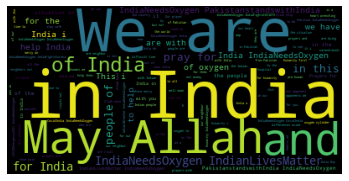

In [87]:
#make a wordcloud 

import nltk 
from nltk.corpus import stopwords 
from wordcloud import WordCloud, STOPWORDS 
stopwords = set()
stopwords.update(["https:","https","href", "t","co"])
textt = "".join([tweet for tweet in df['text']])
wordcloud = WordCloud(stopwords = stopwords).generate(textt)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [99]:
#Remove hashtags and @s
import re
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    #tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    #tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text

    return tweet
df['text'] = df['text'].map(lambda x: cleaner(x))

print(df.text) #function not working

0        India fights Corona. covid share help helpeach...
1        We as a nation forced our PM to help india dur...
2        Shocking Imran Khan Fail Prediction. Listen To...
3        Facts &gt;&gt;&gt; Myth covid indiafightscovid...
4        monkey balancing karke ulta tum bhrwe log Vict...
                               ...                        
28562    Let’s pray for India Let’s pray for Humanity. ...
28563    Get well soon dear neighbour India. We are pra...
28564    Put religion, caste and race aside and pray fo...
28565    We are neighbors not enemy`s We are rivals not...
28566    These are Muslims with gentle heart, whom you ...
Name: text, Length: 28567, dtype: object


In [67]:
#remove all punctuation from data 
#def remove_punctuation(text):
  #  final = "".join([x for x in text if x not in ["?",".", ";",":", "!", ',']])
   # return final 

#df['text'] = df['text'].apply(remove_puctuation)


In [98]:
#get polarity scores 

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA 

sia = SIA()
results = []
for word in df.text:
    pol_score = sia.polarity_scores(word)
    pol_score['text'] = word 
    results.append(pol_score)
    
print(results[:3])

[{'neg': 0.119, 'neu': 0.664, 'pos': 0.217, 'compound': 0.296, 'text': 'India fights Corona. covid share help helpeachother people indiafightscovid indiafightscovid19 indiafightscovid19together indiacovidcrisis indianeedsoxygen indiafightsback CovidSecondWave covidwarriors Unite2FightCorona blackfungus'}, {'neg': 0.156, 'neu': 0.703, 'pos': 0.141, 'compound': -0.2263, 'text': 'We as a nation forced our PM to help india during Covid emergency which BJP rejected. We made IndiaNeedsOxygen top trend for days just because as a nation we only wants peace &amp; prosperity. But what Indians did when PIA plane crashed in Karachi? Besides anything study history.'}, {'neg': 0.19, 'neu': 0.644, 'pos': 0.166, 'compound': -0.2023, 'text': "Shocking Imran Khan Fail Prediction. Listen To Qasim. ♻️ Allah Wanted to Help pakistan Through Qasim's Dream's. Muhammad Qasim Dreams IndiaNeedsOxygen IndianLivesMatter jummahmubarak covidindia ImranKhanCancelEXAMS"}]


In [128]:
#rwrite dataframe with the sentiments for sentiment analysis 
df1 = pd.DataFrame.from_records(results)

In [129]:
df1.tail()

,neg,neu,pos,compound,text
28562,0.000,0.705,0.295,0.5574,Let’s pray for India Let’s pray for Humanity. ...
28563,0.000,0.581,0.419,0.7351,Get well soon dear neighbour India. We are pra...
28564,0.090,0.871,0.039,-0.4875,"Put religion, caste and race aside and pray fo..."
28565,0.000,1.000,0.000,0.0000,We are neighbors not enemy`s We are rivals not...
28566,0.177,0.714,0.109,-0.4215,"These are Muslims with gentle heart, whom you ..."


In [132]:
#create label if compound is more than 0.2 then it label 1, if less than -0.2 then label -1,everything else is 0 

df1['label'] = 0
df1.loc[df1['compound']>0.2, 'label'] = 1
df1.loc[df1['compound']<-0.2, 'label'] = -1
df1.head()

,neg,neu,pos,compound,text,label
0,0.119,0.664,0.217,0.2960,India fights Corona. covid share help helpeach...,1
1,0.156,0.703,0.141,-0.2263,We as a nation forced our PM to help india dur...,-1
2,0.190,0.644,0.166,-0.2023,Shocking Imran Khan Fail Prediction. Listen To...,-1
3,0.000,1.000,0.000,0.0000,Facts &gt;&gt;&gt; Myth covid indiafightscovid...,0
4,0.144,0.856,0.000,-0.7096,monkey balancing karke ulta tum bhrwe log Vict...,-1


In [133]:
#newdata frame to plot with 
df2 = df1[['text', 'label']]
df2.to_csv('label.csv', mode='a', encoding='utf-8', index=False)
df2.tail()

,text,label
28562,Let’s pray for India Let’s pray for Humanity. ...,1
28563,Get well soon dear neighbour India. We are pra...,1
28564,"Put religion, caste and race aside and pray fo...",-1
28565,We are neighbors not enemy`s We are rivals not...,0
28566,"These are Muslims with gentle heart, whom you ...",-1


In [134]:
print(df2.label.value_counts())

print(df2.label.value_counts(normalize=True) * 100)

 1    12709
 0     7984
-1     7874
Name: label, dtype: int64
 1    44.488396
 0    27.948332
-1    27.563272
Name: label, dtype: float64


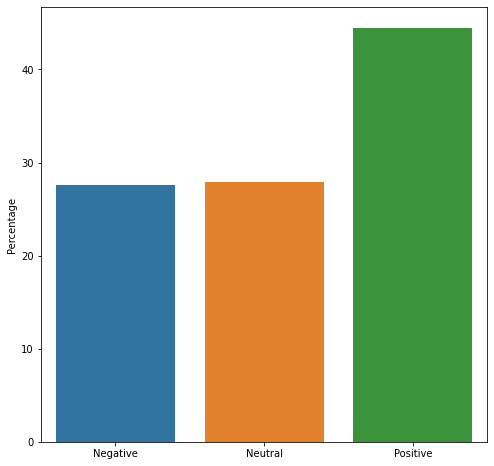

In [135]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df2.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [142]:
print(list(df[df1['label'] == 1].text)[:5]) #positive tweets 

['India fights Corona. covid share help helpeachother people indiafightscovid indiafightscovid19 indiafightscovid19together indiacovidcrisis indianeedsoxygen indiafightsback CovidSecondWave covidwarriors Unite2FightCorona blackfungus', 'Explore your locality like never before. covid share help helpeachother people indiafightscovid indiafightscovid19 indiafightscovid19together indiacovidcrisis indianeedsoxygen indiafightsback Community locality neighbourhood', 'Get vaccinated, Stay safe! covid DeltaPlusVariant vaccination indiacovidcrisis indianeedsoxygen indiafightsback CovidSecondWave deltavariant deltaplusvariant covidwarriors Unite2FightCorona blackfungus whitefungus yellowfungus', 'But prevention is always better than cure. covid share help helpeachother people indiafightscovid indiafightscovid19 indiafightscovid19together indiacovidcrisis indianeedsoxygen indiafightsback CovidSecondWave deltavariant deltaplusvariant', 'Today’s Top News: 26-July-2021... news LatestNews BREAKING Bre

In [143]:
print(list(df[df1['label'] == -1].text)[:5]) #negative tweets
#some of these don't seem necessarily negative s further work is needed..

['We as a nation forced our PM to help india during Covid emergency which BJP rejected. We made IndiaNeedsOxygen top trend for days just because as a nation we only wants peace &amp; prosperity. But what Indians did when PIA plane crashed in Karachi? Besides anything study history.', "Shocking Imran Khan Fail Prediction. Listen To Qasim. ♻️ Allah Wanted to Help pakistan Through Qasim's Dream's. Muhammad Qasim Dreams IndiaNeedsOxygen IndianLivesMatter jummahmubarak covidindia ImranKhanCancelEXAMS", 'monkey balancing karke ulta tum bhrwe log Victims par hi blame karte ho jab wo Radicalization point out karte hai. You libbus deserve every filth you get. because you got no humanity bas agenda hai tumhara. i will give you a example - yaad hai IndiaNeedsOxygen trend?', 'Here are some tips to manage the stress amid Covid19 covid indiacovidcrisis indianeedsoxygen indiafightsback CovidSecondWave deltavariant deltaplusvariant covidwarriors Unite2FightCorona blackfungus whitefungus yellowfungus',

In [159]:
#create a function to tokenize and remove stopwords 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer, TweetTokenizer

def process_text(text):
    tokens = []
    twzr = TweetTokenizer()
    for line in text:
        toks = twzr.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

process_text('hi this looks 3£ like @spam')

NameError: name 'stop_words' is not defined

In [157]:
#create a function to tokenize and remove stopwords 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer, TweetTokenizer